***[Integrantes:]() David Santiago Florez Alsina, Juan José Caballero, Nicolás Dussan Castañeda***

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1.1 Leyes de Kepler

***Constante K en unidades astronómicas***
[Datos obtenidos de aquí](https://www.windows2universe.org/our_solar_system/planets_orbits_table.html&lang=sp)

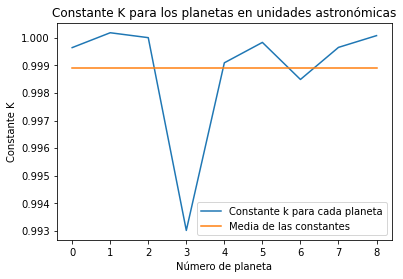

la constante es:  0.9988848307405997


In [2]:
#mercurio, venus, tierra, marte,
#jupiter, saturno, urano, neptuno, pluton 
semi_eje_mayor_ua  = np.array([0.3871, 0.7233, 1.0000, 1.5273,
                               5.2028, 9.5388, 19.1914, 30.0611,
                               39.5294]) 

periodo_orbital_ua = np.array([0.2408, 0.6152, 1.0000,
                               1.8809, 11.862, 29.458,
                               84.01, 164.79, 248.54]) 

K1 = periodo_orbital_ua**2/semi_eje_mayor_ua**3
mean_K1 = np.ones(K1.shape) * np.mean(K1)

plt.plot(K1)
plt.plot(mean_K1)
plt.title("Constante K para los planetas en unidades astronómicas")
plt.xlabel("Número de planeta")
plt.ylabel("Constante K")
plt.legend(["Constante k para cada planeta","Media de las constantes"])
plt.show()

print("la constante es: ", np.mean(K1))

***constante k en unidades de $s^{2}/km^{3}$***

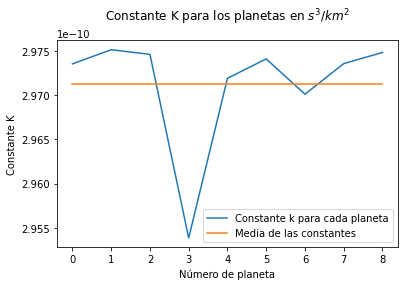

la constante es:  2.971304193797569e-10


In [3]:
#segundos en un año
time_unit = (3600*24*365.25)    

#distancia entre la tierra y el sol
distance_unit = 149597870.700   

#mercurio, venus, tierra, marte,
#jupiter, saturno, urano, neptuno, pluton 
semi_eje_mayor_no_ua  = semi_eje_mayor_ua * distance_unit
periodo_orbital_no_ua = periodo_orbital_ua * time_unit

K2 = periodo_orbital_no_ua**2/semi_eje_mayor_no_ua**3
mean_K2 = np.ones(K2.shape) * np.mean(K2)


figure, axes = plt.subplots(nrows=1, ncols=1)
figure.tight_layout()
figure.tight_layout(pad=3.0)

axes.plot(K2)
axes.plot(mean_K2)
axes.set_title("Constante K para los planetas en $s^{3}/km^{2}$", pad=20)
axes.set_xlabel("Número de planeta")
axes.set_ylabel("Constante K")
axes.legend(["Constante k para cada planeta","Media de las constantes"])
plt.show()

print("la constante es: ", np.mean(K2))

## Ejercicio 1.2 Ley de Titius-Bode

In [4]:
def titius_bode(n: np.array):
    
    return 0.4 + 0.3*np.power(2, n)

Text(0, 0.5, 'Medida semieje mayor en unidades astronómicas')

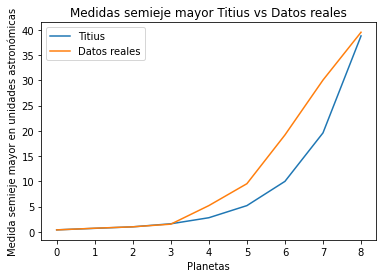

In [5]:
n = np.array([-np.inf, 0, 1, 2, 3, 4, 5, 6, 7])

semieje_mayor_titius = titius_bode(n)


plt.plot(semieje_mayor_titius)
plt.plot(semi_eje_mayor_ua)
plt.legend(["Titius","Datos reales"])
plt.title("Medidas semieje mayor Titius vs Datos reales")

plt.xlabel("Planetas")
plt.ylabel("Medida semieje mayor en unidades astronómicas")

## Ejercicio 2 Ley de gravitación universal

In [6]:
def planet_orbit(x0: float, y0: float,
                 vx0: float, vy0: float,
                 m1: float, m2: float,
                 ti: float, tf: float, resolution: float):
    
    """
    x0:  posición inicial en x
    y0:  posición inicial en y
    vx0: velocidad inicial en x
    vy0: velocidad inicial en y
    m1: masa 1 (masa del objeto entorno al que se orbita)
    m2: masa 2 (masa del objeto que orbita)
    ti: tiempo inicial
    tf: tiempo final
    resolution: distancia entre punto y punto de la serie de tiempo 
                (tiene que ser menor igual a 1)
    """
    
    time = np.arange(ti, tf, resolution)
    npoints = time.shape[0]
    G = 4*np.pi**2
    
    #posición en x
    x = np.zeros((1, npoints))
    x[0, 0] = x0
    
    #posición en y
    y = np.zeros((1, npoints))
    y[0, 0] = y0
    
    #distancia radio
    r = np.zeros((1, npoints))
    r[0, 0] = np.sqrt(x0**2 + y0**2)
    
    #velocidad en x
    vx = np.zeros((1, npoints))
    vx[0, 0] = vx0
    
    #velocidad en y
    vy = np.zeros((1, npoints))
    vy[0, 0] = vy0
    
    #print(x.shape)
    #print(y.shape)
    #print(vx.shape)
    #print(vx.shape)
    #print(r.shape)
    #print((tf-ti)*npoints)

    
    for sec in range( npoints - 1):
        
        x[0, sec + 1] = x[0, sec] + (vx[0, sec]*resolution)
        y[0, sec + 1] = y[0, sec] + (vy[0, sec]*resolution)
        r[0, sec + 1] = np.sqrt( x[0, sec +1]**2 + y[0, sec+1]**2)

        
        # velocidad_[t] - (delta * aceleracion_[t])
        vx[0, sec +1] = vx[0, sec] - resolution *\
                        ((G*m1*x[0, sec]) /(r[0, sec]**3))
        
        vy[0, sec +1] = vy[0, sec] - resolution *\
                        ((G*m1*y[0, sec]) /(r[0, sec]**3))
    

    return x[0,:], y[0,:], vx[0,:], vy[0,:]
    
    
    

In [7]:
def calc_period(x0: float, y0:float, vx0:float, vy0:float):
    """
    x0:  posición inicial en x
    y0:  posición inicial en y
    vx0: velocidad inicial en x
    vy0: velocidad inicial en y
    """
    
    return int(2*np.pi* np.sqrt(x0**2 + y0**2) \
               /np.sqrt(vx0**2 + vy0**2) ) + 1

***Para este caso podemos ver como la masa que se posiciona inicialmente en (1, 0) va orbitando haciendo una espiral mientras se aleja de la masa del cuerpo m1. Note como se ha hecho esta gráfica para un solo periodo de la órbita. Esto usando la fórmula $T = \frac{2\pi r}{v}$, la razón por la que esta implementación hace función techo a el valor calculado de $T$, es porque la función hecha no soporta tiempos decimales.*** Regresando al análisis de la trayectoria, este explica porque la masa del cuerpo central *m1* es muy pequeña como para atrapar a m2 en su órbita.

Text(0, 0.5, 'Posición en Y')

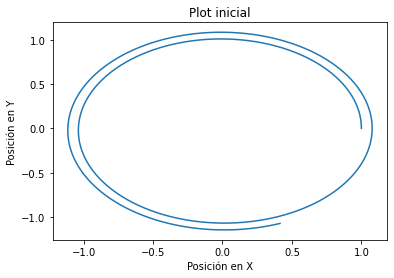

In [8]:
x0 = 1 
y0 = 0
vx0 = 0
vy0 = 6.28
period = calc_period(x0=x0, y0=y0, vx0=vx0, vy0=vy0)
resolution =  0.001

x, y, vx, vy = planet_orbit(x0 = x0, y0 = y0,
                             vx0 = vx0, vy0 = vy0,
                             m1 = 1, m2 = 5,
                             ti = 0, tf = period,
                             resolution =  resolution)

plt.plot(x,y)
plt.title("Plot inicial")
plt.xlabel("Posición en X")
plt.ylabel("Posición en Y")

***Para la siguiente gráfica***, vemos como la velocidad en y no es tanta como para alejarse rápidamente de la masa *m1*, pero en lo que orbita cerca de la masa central llega a acercarse mucho a esta, aumentando la aceleración que tiene y usando esta para escaparse de la influencia de la masa *m1* (asuma que esta está en el origen $(0, 0)$ ).

Text(0, 0.5, 'Posición en Y')

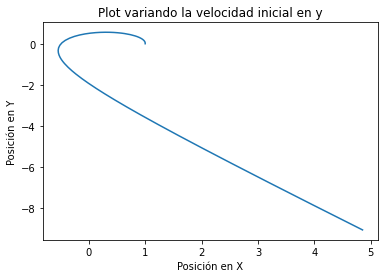

In [9]:
vx0 = 0
vy0 = 4
x0 = 1 
y0 = 0
period = calc_period(x0=x0, y0=y0, vx0=vx0, vy0=vy0)
resolution =  0.01

x1, y1, vx1, vy1 = planet_orbit(x0= x0, y0= y0,
                                vx0= vx0, vy0= vy0,
                                m1= 1, m2= 5,
                                ti= 0, tf= period,
                                resolution= resolution)

plt.plot(x1, y1)
plt.title("Plot variando la velocidad inicial en y")
plt.xlabel("Posición en X")
plt.ylabel("Posición en Y")

***Aquí*** $v_{y}$ es lo suficientemente grande como para escapar desde un principio de la atracción generada por m1, desviando un poco su dirección hacia la izquierda.

Text(0, 0.5, 'Posición en Y')

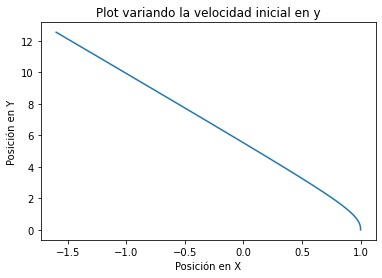

In [10]:
x0 = 1 
y0 = 0
vx0 = 0
vy0 = 15
period = calc_period(x0=x0, y0=y0, vx0=vx0, vy0=vy0)
resolution =  0.01

x2, y2 , vx2, vy2 = planet_orbit(x0 = x0, y0 = y0,
                                  vx0 = vx0, vy0 = vy0,
                                  m1 = 1, m2 = 5,
                                  ti = 0, tf = period,
                                  resolution=resolution)

plt.plot(x2, y2)
plt.title("Plot variando la velocidad inicial en y")
plt.xlabel("Posición en X")
plt.ylabel("Posición en Y")

##### **A)** Para comprobar numéricamente la segunda ley de kepler ***los planetas barren areas iguales en tiempos iguales*** apliquemos:

$$
area = \frac{1}{2} \Delta t (xv_{y} - yv_{x})
$$

In [11]:
def verify_same_area_in_same_time(x: np.ndarray, y: np.ndarray,
                                  vx: np.ndarray, vy: np.ndarray,
                                  delta: float, verbose = True):
    
    area = (1/2)*delta*(np.multiply(x, vy) - np.multiply(y, vx))
    mean_area = str(np.mean(area))
    var_area = str(np.var(area))
    
    if verbose:
        print("El area barrida en un intervalo de tiempo es: " +
              mean_area)

        print("La varianza del area barrida en un intervalo " +
              "de tiempo es: " + var_area)
        print()
    
    return area, mean_area, var_area

***Note cómo para las 3 computaciones que se hicieron la varianza es mínima, es decir su media es extremadamente precisa, con lo que podemos verificar el hecho de que se barre la misma area en tiempos iguales.***

In [12]:
_ = verify_same_area_in_same_time(x, y, vx, vy, resolution)
_ = verify_same_area_in_same_time(x1, y1, vx1, vy1, resolution)
_ = verify_same_area_in_same_time(x2, y2, vx2, vy2, resolution)


El area barrida en un intervalo de tiempo es: 0.03251184828479119
La varianza del area barrida en un intervalo de tiempo es: 3.664368018506391e-07

El area barrida en un intervalo de tiempo es: 0.03359148618819842
La varianza del area barrida en un intervalo de tiempo es: 2.221762684102948e-05

El area barrida en un intervalo de tiempo es: 0.0771659566826939
La varianza del area barrida en un intervalo de tiempo es: 1.773230319783875e-07



##### **B)** Grafique el área en función del tiempo para una órbita circular y una elíptica.

*Empecemos por el área en función del tiempo de una órbita __circular__*

In [13]:
def circular_movement(degrees, radious,
                      ti: float, tf: float,
                      delta: float):
    
    t = np.arange(ti, tf, delta)
    
    rads = degrees(t)*np.pi/180
    distance = radious(t)
    
    #obtengo la posición en x e y
    r_x = distance*np.cos(rads)
    r_y = distance*np.sin(rads)

    
    # el area de un segmento de círculo
    # es A = (r^2) * alpha/2, alpha (angulo recorrido)

    area = np.multiply(np.power(distance[:-1], 2),
                       np.abs(rads[1:] - rads[0:-1])/2)
    
    
    return t[:-1], r_x[:-1], r_y[:-1], area

In [14]:
def degrees(t: np.array):
    
    return t

def radious(t: np.array):
    
    return np.ones((t.shape[0],))*1000

*Veamos el área en función del tiempo de una órbita __circular__*

In [15]:
# Calculo de variables para el plot
delta = 0.001
ti = 0
tf = 360

t3, x3, y3, area3 = circular_movement(degrees, radious,
                                      ti = ti, tf = tf,
                                      delta = delta)

print(np.max(area3), np.min(area3),
      np.mean(area3), np.var(area3))

8.726646260726056 8.726646259393789 8.72664625997165 4.5682374578101e-20


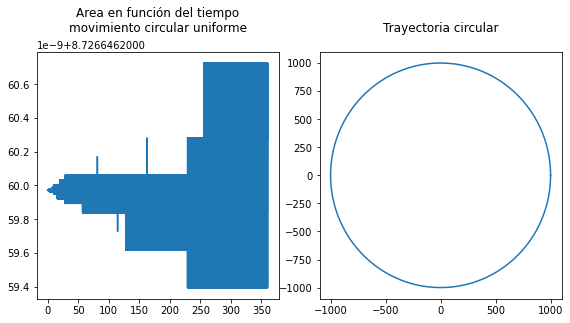

In [16]:
# Graficado
fig, axs = plt.subplots(nrows = 1, ncols = 2,
                       figsize=(8,4))
fig.tight_layout()
fig.tight_layout(pad = 1.0)

axs[0].set_title("Area en función del tiempo\n" + 
                 "movimiento circular uniforme",
                 pad = 20)
axs[0].plot(t3, area3)

axs[1].set_title("Trayectoria circular", pad = 20)
axs[1].plot(x3, y3)

plt.show()

*Continuemos por el área en función del tiempo de una órbita __elíptica__* [la fórmula usada para calcular el sector de area de una elipse proviene de acá.](https://math.stackexchange.com/questions/114371/deriving-the-area-of-a-sector-of-an-ellipse#:~:text=The%20area%20of%20the%20original,which%20is%20straightforward%20to%20find.)

In [17]:
def elipsis(degrees,
            a: float, b: float,
            ti: float, tf: float,
            delta: float):
    
    t = np.arange(ti, tf, delta)
    rads = degrees(t)*np.pi/180
    
    radious = 1/np.sqrt( (np.cos(rads)**2)/(a**2) +
                         (np.sin(rads)**2)/(b**2))
    
    x = radious*np.cos(rads) 
    y = radious*np.sin(rads)
    
    area = (a*b/2)*(np.arctan(a * (np.tan(rads[1:])/b) ) -
                    np.arctan(a * (np.tan(rads[0:-1])/b)) )
    
    return t[:-1], x[:-1], y[:-1], area

In [18]:
a = 2000
b = 6000
ti = 0
tf = 360
delta = 0.001

t4, x4, y4, area4 = elipsis(degrees, a=a, b=b,
                            ti=ti, tf=tf, delta=delta)

print(np.max(area4), np.min(area4),
      np.mean(area4))

314.159265102365 -18849241.76227365 -9.69630055525261e-05


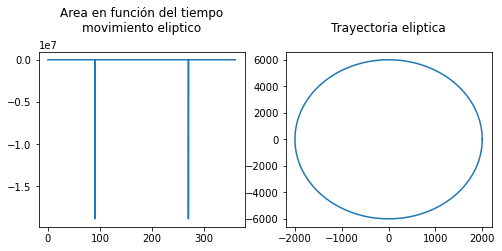

In [19]:
# Graficado
fig, axs = plt.subplots(nrows = 1, ncols = 2,
                       figsize=(7,3))
fig.tight_layout()
fig.tight_layout(pad = 1.0)

axs[0].set_title("Area en función del tiempo\n" + 
                 "movimiento eliptico",
                 pad = 20)
axs[1].set_title("Trayectoria eliptica", pad = 20)
axs[0].plot(t4, area4)
axs[1].plot(x4, y4)

plt.show()

## Ejecicio 3 Correción relativista a la ley de gravitación 

***A) Considere:***
$$
\vec{F}(r) = C \frac{m}{r^{2 + \delta}}
$$

donde $\delta << 1$ y por simplicidad $C = GM$, considere las siguientes condiciones iniciales, $x_{0} = 1$, $y_{0} = 0$, $vx_{0} = 0$, $vy_{0} = 5$, $\delta = 1$, ¿qué tipo de orbita se obtiene?

In [20]:
def planet_orbit2(x0: float, y0: float,
                  vx0: float, vy0: float,
                  m1: float, m2: float,
                  ti: float, tf: float,
                  resolution: float, delta: float):
    
    """
    x0:  posición inicial en x
    y0:  posición inicial en y
    vx0: velocidad inicial en x
    vy0: velocidad inicial en y
    m1: masa 1 (masa del objeto entorno al que se orbita)
    m2: masa 2 (masa del objeto que orbita)
    ti: tiempo inicial
    tf: tiempo final
    resolution: distancia entre punto y punto de la serie de tiempo 
                (tiene que ser menor igual a 1)
    alpha: parametro adimensional
    """
    
    time = np.arange(ti, tf, resolution)
    npoints = time.shape[0]
    G = 4*np.pi**2
    
    
    #posición en x
    x = np.zeros((1, npoints))
    x[0, 0] = x0
    
    #posición en y
    y = np.zeros((1, npoints))
    y[0, 0] = y0
    
    #distancia radio
    r = np.zeros((1, npoints))
    r[0, 0] = np.sqrt(x0**2 + y0**2)
    
    #velocidad en x
    vx = np.zeros((1, npoints))
    vx[0, 0] = vx0
    
    #velocidad en y
    vy = np.zeros((1, npoints))
    vy[0, 0] = vy0
    
    F = G*m1*m2/(r[0,0]**(2 + delta))
    
    #print(x.shape)
    #print(y.shape)
    #print(vx.shape)
    #print(vx.shape)
    #print(r.shape)
    #print((tf-ti)*npoints)

    
    for sec in range( npoints - 1):
        
        x[0, sec + 1] = x[0, sec] + (vx[0, sec]*resolution)
        y[0, sec + 1] = y[0, sec] + (vy[0, sec]*resolution)
        r[0, sec + 1] = np.sqrt( x[0, sec +1]**2 + y[0, sec+1]**2)

        
        # velocidad_[t] - (delta * aceleracion_[t])
        vx[0, sec +1] = vx[0, sec] - resolution *\
                        ((F*m1*x[0, sec]) /(r[0, sec]**3))
        
        vy[0, sec +1] = vy[0, sec] - resolution *\
                        ((F*m1*y[0, sec]) /(r[0, sec]**3))
    

    return x[0,:], y[0,:], vx[0,:], vy[0,:]

Text(0, 0.5, 'Posición en Y')

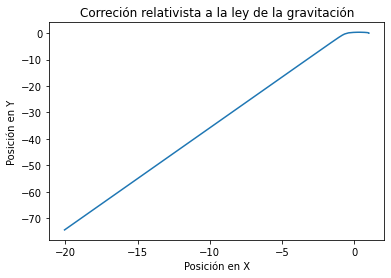

In [21]:
x0 = 1 
y0 = 0
vx0 = 0
vy0 = 5
period = calc_period(x0=x0, y0=y0, vx0=vx0, vy0=vy0)
resolution =  0.01
delta = 0.5

x5, y5 , vx5, vy5 = planet_orbit2(x0 = x0, y0 = y0,
                                  vx0 = vx0, vy0 = vy0,
                                  m1 = 1, m2 = 5,
                                  ti = 0, tf = period,
                                  resolution = resolution,
                                  delta = delta)

plt.plot(x5, y5)
plt.title("Correción relativista a la ley de la gravitación")
plt.xlabel("Posición en X")
plt.ylabel("Posición en Y")

***B) El resultado muestra que la ecuación de movimiento para la trayectoria
del planeta se escribe como:***

$$
\frac{d^{2}\vec{r}}{dt^{2}} = 
-\frac{GM}{r^2}\bigg[ 1 + \alpha\bigg( \frac{GM}{c^2}\bigg)^{2}
 \frac{1}{r^2}\bigg]\hat{r}
$$

Sea $\alpha = 0.001, GM = 4\pi^{4}$, $c$ la velocidad de la luz, grafique. 

In [22]:
def planet_orbit3(x0: float, y0: float,
                  vx0: float, vy0: float,
                  m1: float, m2: float,
                  ti: float, tf: float,
                  resolution: float, alpha: float):
    
    """
    x0:  posición inicial en x
    y0:  posición inicial en y
    vx0: velocidad inicial en x
    vy0: velocidad inicial en y
    m1: masa 1 (masa del objeto entorno al que se orbita)
    m2: masa 2 (masa del objeto que orbita)
    ti: tiempo inicial
    tf: tiempo final
    resolution: distancia entre punto y punto de la serie de tiempo 
                (tiene que ser menor igual a 1)
    alpha: parametro adimensional
    """
    
    time = np.arange(ti, tf, resolution)
    npoints = time.shape[0]
    GM = 4*np.pi**2
    
    #velocidad de la luz en km/h
    c = 299792458 
    
    #posición en x
    x = np.zeros((1, npoints))
    x[0, 0] = x0
    
    #posición en y
    y = np.zeros((1, npoints))
    y[0, 0] = y0
    
    #distancia radio
    r = np.zeros((1, npoints))
    r[0, 0] = np.sqrt(x0**2 + y0**2)
    
    #velocidad en x
    vx = np.zeros((1, npoints))
    vx[0, 0] = vx0
    
    #velocidad en y
    vy = np.zeros((1, npoints))
    vy[0, 0] = vy0
        
    #print(x.shape)
    #print(y.shape)
    #print(vx.shape)
    #print(vx.shape)
    #print(r.shape)
    #print((tf-ti)*npoints)

    
    for sec in range( npoints - 1):
        
        x[0, sec + 1] = x[0, sec] + (vx[0, sec]*resolution)
        y[0, sec + 1] = y[0, sec] + (vy[0, sec]*resolution)
        r[0, sec + 1] = np.sqrt( x[0, sec +1]**2 + y[0, sec+1]**2)

        a = (GM/(r[0, sec]**2)) *\
            ( 1 + (alpha*(GM/(c**2))**2) * 1/(r[0, sec]**2) )
                  
        # velocidad_[t] - (delta * aceleracion_[t])
        vx[0, sec +1] = vx[0, sec] - resolution* a * x[0, sec]
        
        vy[0, sec +1] = vy[0, sec] - resolution* a *y[0, sec]

    return x[0,:], y[0,:], vx[0,:], vy[0,:]

Text(0, 0.5, 'Posición en Y')

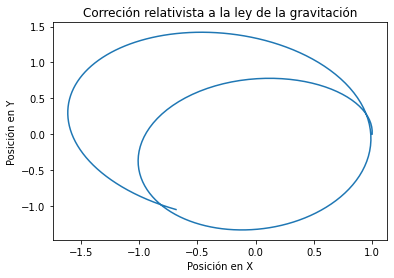

In [116]:
x0 = 1 
y0 = 0
vx0 = 0
vy0 = 5
period = calc_period(x0=x0, y0=y0, vx0=vx0, vy0=vy0)
resolution =  0.01
alpha = 0.001

x6, y6, vx6, vy6 = planet_orbit3(x0 = x0, y0 = y0,
                                  vx0 = vx0, vy0 = vy0,
                                  m1 = 1, m2 = 5,
                                  ti = 0, tf = period*1,
                                  resolution = resolution,
                                  alpha = alpha)

plt.plot(x6, y6)
plt.title("Correción relativista a la ley de la gravitación")
plt.xlabel("Posición en X")
plt.ylabel("Posición en Y")

[Para calcular la magnitud de la velociadad incial al cuadrado necesaria para mantener en órbita al cuerpo se usó esta *fuente*](http://www.sc.ehu.es/sbweb/fisica3/celeste/orbitas/orbitas.html) [otras fuentes](http://www.sc.ehu.es/sbweb/fisica3/celeste/ecuacion/ecuacion.html)

In [130]:
def calc_initial_v(x0: float, y0: float,
                   m1: float, m2: float):
    
    """
    x0:  posición inicial en x
    y0:  posición inicial en y
    m1: masa 1 (masa del objeto entorno al que se orbita)
    m2: masa 2 (masa del objeto que orbita)
    """
    G  = 4*np.pi**2 #6.67384*(10**-11)
    r0 = np.sqrt( (x0**2) + (y0**2))
    
    f_gravedad = (-G*m1*m2/(r0**2))
    z = -m2 * (m1**2) * (G**2)
    psi = (r0**2) * m2
    rho = 2 * (r0**3) * f_gravedad 
    
    v0_squared1 = ((-rho) + np.sqrt( (rho**2) - (4*psi*z) ))/(2*psi)
    v0_squared2 = ((-rho) - np.sqrt( (rho**2) - (4*psi*z) ))/(2*psi)
    
    v0_squared = max(v0_squared1, v0_squared2)
    v0 = np.sqrt(v0_squared)
    
    #e = (r0 * f_gravedad) + (m2/2)*v0_squared 
    #a = (-m2*G*m1)/( 2 * e)
    #b = ( np.sqrt(a) * (m2 * v0 * r0) )/(m2 * np.sqrt(G*m1))
    #print(a, b)
    
    return v0_squared

In [134]:
x0 = 1 
y0 = 0
M = 1
m = 5
v0_squared = calc_initial_v(x0=x0, y0=y0,
                            m1=M, m2=m)
print(v0_squared)

95.30933120146847


In [135]:
x7, y7, vx7, vy7 = planet_orbit(x0 = x0, y0 = y0,
                                 vx0 = -np.sqrt(v0_squared/2),
                                 vy0 = np.sqrt(v0_squared/2),
                                 m1 = 1, m2 = 5,
                                 ti = 0, tf = period,
                                 resolution = resolution,
                                )

Text(0, 0.5, 'Posición en Y')

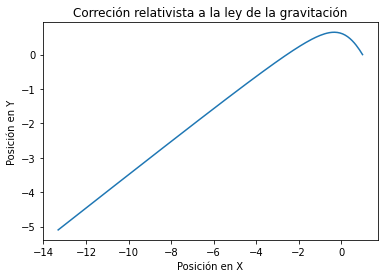

In [136]:
plt.plot(x7, y7)
plt.title("Correción relativista a la ley de la gravitación")
plt.xlabel("Posición en X")
plt.ylabel("Posición en Y")